# ***Team Modelling***

In [96]:
# Import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer, matthews_corrcoef, f1_score, classification_report, fbeta_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestRegressor

from Error_analysis import calculate_cost

RSEED= 42

sns.set(rc={'figure.figsize':(10,5)})
plt.rcParams['figure.dpi'] = 300

In [2]:
# Import Dataset

df= pd.read_csv('data/training_preprocessed.csv')

In [3]:
y= df.FraudResult
df.drop("FraudResult", axis=1, inplace=True)
X= df
X.drop(["TransactionId"], axis=1, inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)
X_test_unscaled = X_test.copy()

In [42]:
rf = RandomForestClassifier(oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [43]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(oob_score=True)>

In [44]:
y_pred = rf.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[23862,     6],
       [   18,    30]])

In [46]:
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.625
0.8123743086978381


In [47]:
minmax = MinMaxScaler()
stdsc = StandardScaler()

In [48]:
X_train['ModAmount'] = stdsc.fit_transform(pd.DataFrame(X_train['ModAmount']))
X_test['ModAmount'] = stdsc.transform(pd.DataFrame(X_test['ModAmount']));

In [49]:
X_test_unscaled

,Year,Month,Week,Day,is_workday,is_worktime,SignAmount,ModAmount,ProviderId_1,ProviderId_2,...,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day,day_vs_week,day_vs_month,week_vs_month
94322,2019,2,7,12,1,0,0,1000.0,0,0,...,0,1,1,8,8,8,6,0.750000,0.750000,1.000000
6241,2018,11,47,23,1,1,1,27612.0,0,0,...,1,0,1,120,27,12,10,0.833333,0.370370,0.444444
2137,2018,11,46,16,1,0,0,55.0,0,0,...,1,0,1,29,19,10,2,0.200000,0.105263,0.526316
61893,2019,1,3,16,1,1,1,1000.0,0,0,...,1,0,1,106,22,10,3,0.300000,0.136364,0.454545
88068,2019,2,6,7,1,1,1,10000.0,0,0,...,1,0,1,225,225,131,37,0.282443,0.164444,0.582222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13930,2018,12,49,3,1,1,0,25.0,0,0,...,1,0,1,95,12,12,5,0.416667,0.416667,1.000000
86419,2019,2,6,5,1,0,0,100.0,0,0,...,1,0,1,75,22,10,2,0.200000,0.090909,0.454545
73670,2019,1,4,26,0,1,1,5000.0,0,0,...,1,0,1,131,83,28,7,0.250000,0.084337,0.337349
72591,2019,1,4,25,1,1,0,1000.0,0,0,...,1,0,1,28,7,7,7,1.000000,1.000000,1.000000


In [50]:
""" rand_param_grid = {'n_estimators': np.linspace(10, 100).astype(int),
                    'max_depth': [None] + list(np.linspace(3, 100).astype(int)),
                    'max_features': ['sqrt', None] + list(np.arange(0.5, 1, 0.1)),
                    'max_leaf_nodes': [None] + list(np.linspace(10, 50).astype(int)),
                    'min_samples_split': [2, 5, 10, 50]
                    }

scorer = make_scorer(matthews_corrcoef)

rand_grid = RandomizedSearchCV(rf, param_distributions=rand_param_grid, n_jobs=-1, scoring=scorer, n_iter=100, verbose=0, random_state=RSEED) """;

In [51]:
# param grid is small because we narrow down using optimal parameters from long grid search

param_grid = {'n_estimators': [125],#np.linspace(100, 200, 5).astype(int),
                    #'max_depth': [None] + list(np.linspace(3, 100, 10).astype(int)),
                    'max_features': [0.75], #['sqrt']+ list(np.arange(0.5, 1, 0.25)),
                    'max_leaf_nodes': list(np.linspace(80, 200, 5).astype(int)),# + [None],
                    'min_samples_split':[5]# [2, 5, 10, 50]
                    }

scorer = make_scorer(matthews_corrcoef)

rand_grid = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, scoring=scorer, verbose=5)

In [52]:
rand_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 4/5] END max_features=0.75, max_leaf_nodes=80, min_samples_split=5, n_estimators=125;, score=0.852 total time=  10.6s
[CV 5/5] END max_features=0.75, max_leaf_nodes=80, min_samples_split=5, n_estimators=125;, score=0.929 total time=  11.2s
[CV 1/5] END max_features=0.75, max_leaf_nodes=110, min_samples_split=5, n_estimators=125;, score=0.947 total time=  11.5s
[CV 3/5] END max_features=0.75, max_leaf_nodes=110, min_samples_split=5, n_estimators=125;, score=0.949 total time=  11.6s
[CV 1/5] END max_features=0.75, max_leaf_nodes=80, min_samples_split=5, n_estimators=125;, score=0.947 total time=  12.2s
[CV 2/5] END max_features=0.75, max_leaf_nodes=80, min_samples_split=5, n_estimators=125;, score=0.912 total time=  12.1s
[CV 2/5] END max_features=0.75, max_leaf_nodes=110, min_samples_split=5, n_estimators=125;, score=0.896 total time=  12.6s
[CV 3/5] END max_features=0.75, max_leaf_nodes=80, min_samples_split=5, n_estimator

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_features': [0.75],
                         'max_leaf_nodes': [80, 110, 140, 170, 200],
                         'min_samples_split': [5], 'n_estimators': [125]},
             scoring=make_scorer(matthews_corrcoef), verbose=5)

In [53]:
rand_grid.best_params_

{'max_features': 0.75,
 'max_leaf_nodes': 140,
 'min_samples_split': 5,
 'n_estimators': 125}

In [54]:
y_pred_grid = rand_grid.best_estimator_.predict(X_test)

In [124]:
print(f"Recall is: {round(recall_score(y_test, y_pred_grid),3)}")
print(f"MCC is: {round(matthews_corrcoef(y_test, y_pred_grid),3)}")
print(f"F1 is: {round(f1_score(y_test, y_pred_grid),3)}")
#print(f"OOB-Score is: {round((rf.oob_score_),3)}")
new_predict = np.argmax(rf.oob_decision_function_,axis=1)
new_matt = matthews_corrcoef(y_train, new_predict)
print(f"MCC of OOB is: {round(new_matt,3)}")

Recall is: 0.792
MCC is: 0.878
F1 is: 0.874
MCC of OOB is: 0.777


<AxesSubplot:>

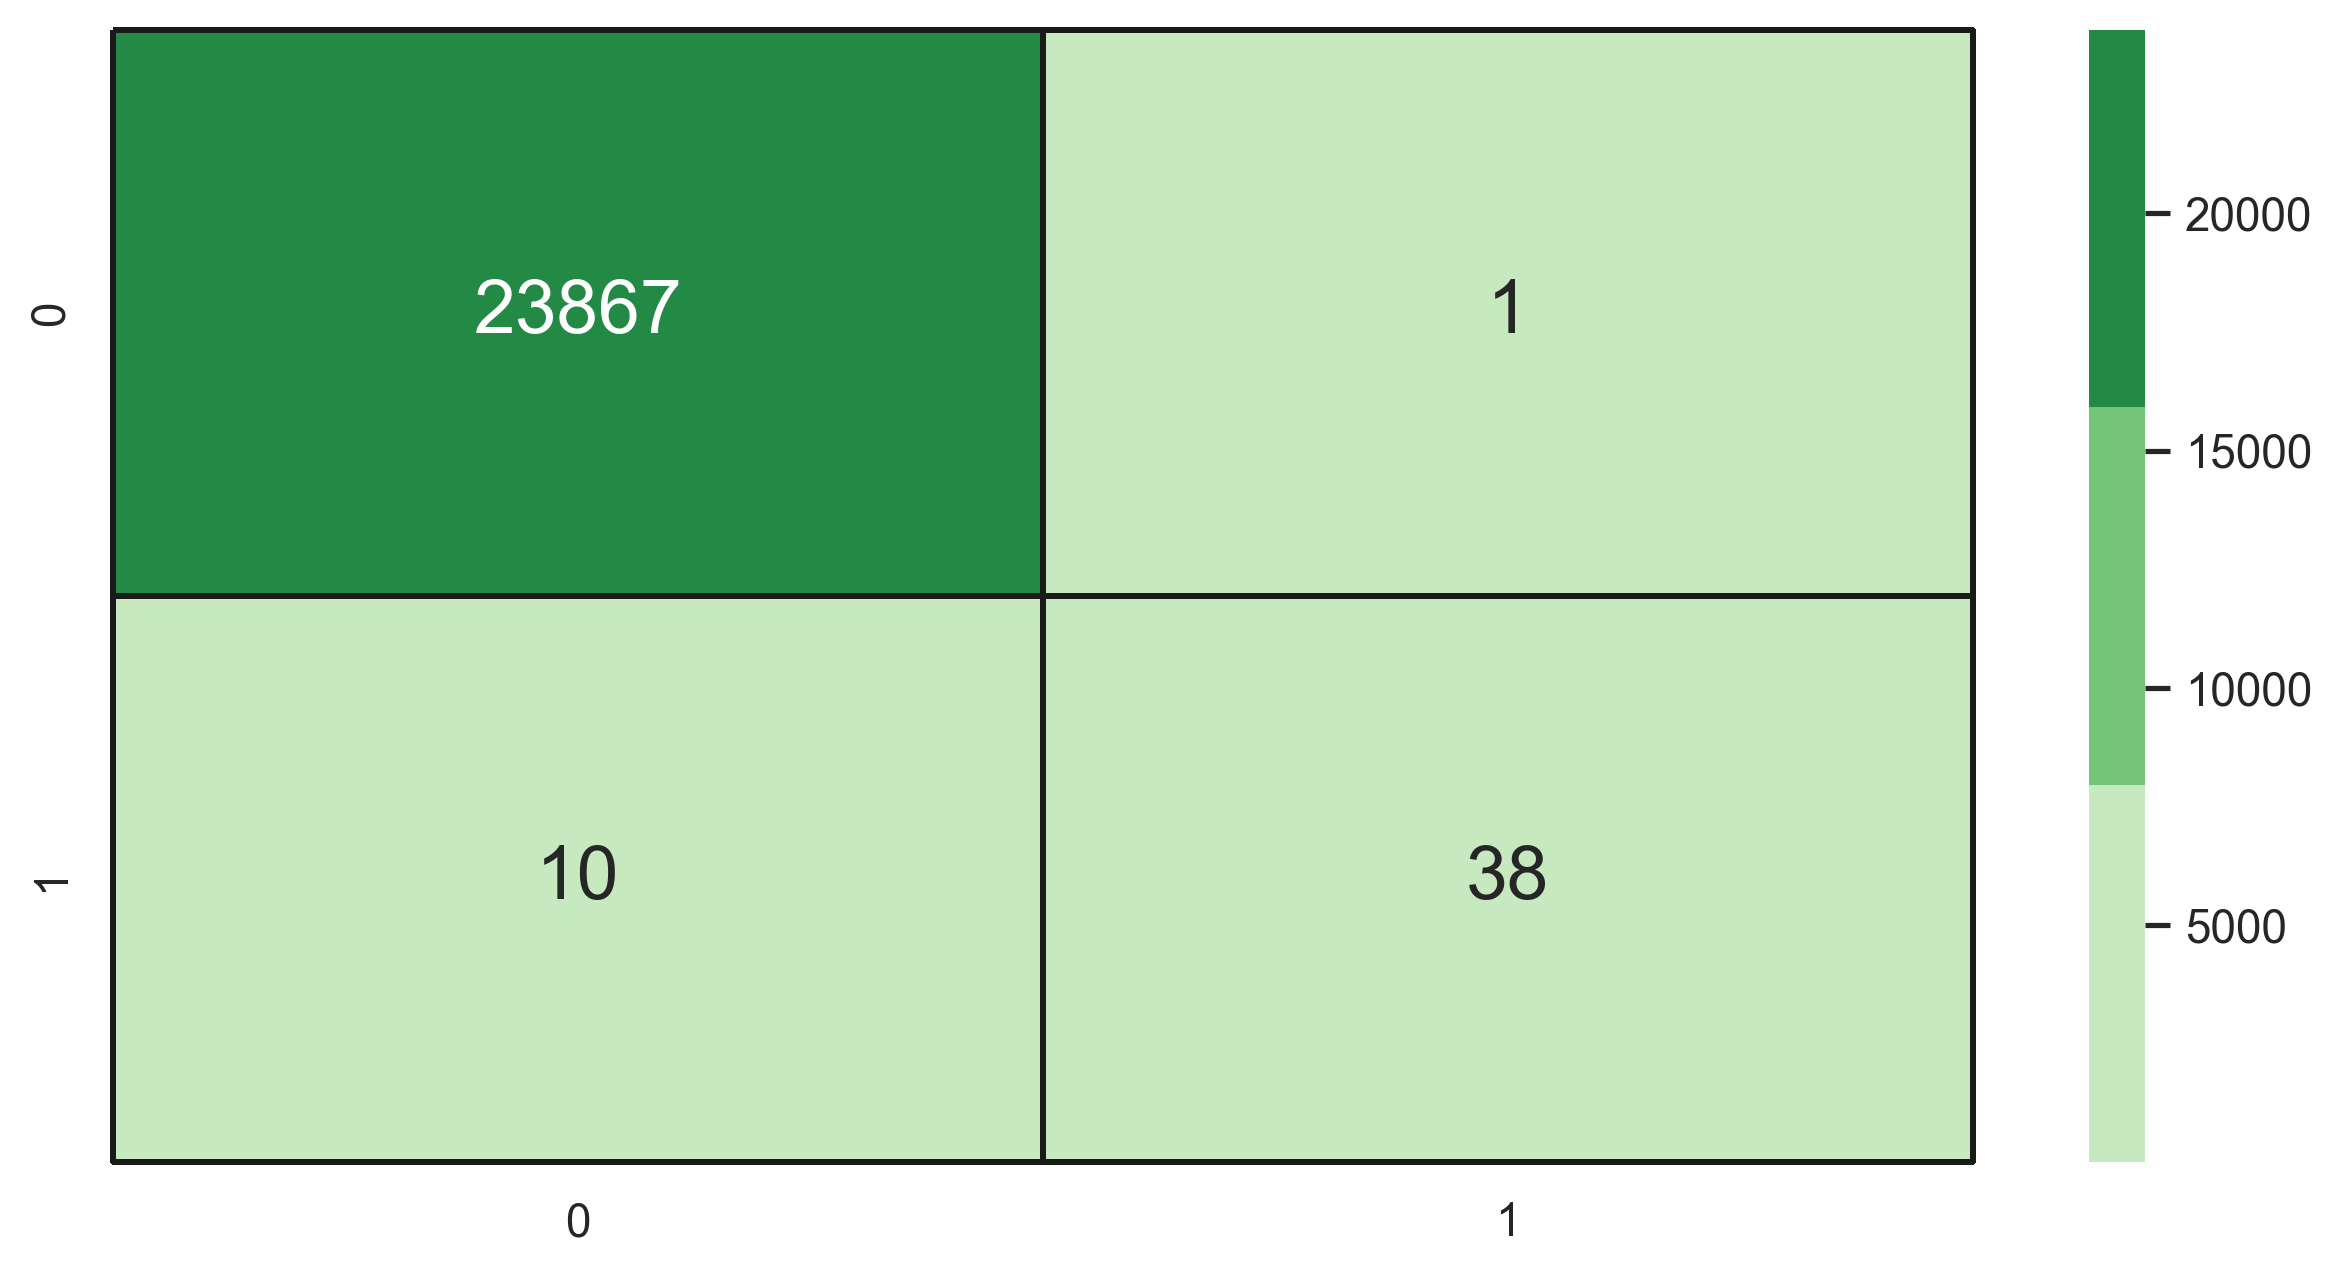

In [56]:
matrix = confusion_matrix(y_test, y_pred_grid)
colormap = sns.color_palette("Greens", 3)
plt.figure(dpi=300)
sns.heatmap(data=matrix, annot=True, fmt='.0f', annot_kws={"fontsize":18}, linewidths=1, linecolor='k', cmap=colormap, clip_on=False)

In [57]:
calculate_cost(X_test_unscaled, y_test, y_pred_grid)

You saved the company 86.02 Million UGX
The company still has to reimburse frauds with a total of 11.8 Million UGX
Total money saved is 74.22 Million UGX


In [58]:
"""{'max_features': 0.75,
 'max_leaf_nodes': 80,
 'min_samples_split': 5,
 'n_estimators': 125}

 Recall is:0.792
MCC is:0.878

You saved the company 86.02 Million UGX
The company still has to reimburse frauds with a total of 11.8 Million UGX
Total money saved is 74.22 Million UGX""";

In [59]:
"""param_grid = {'n_estimators': #np.linspace(100, 200, 5).astype(int),
                    'max_depth': [None] + list(np.linspace(3, 100, 10).astype(int)),
                    'max_features': [0.75], ['sqrt']+ list(np.arange(0.5, 1, 0.25)),
                    'max_leaf_nodes': list(np.linspace(80, 100, 5).astype(int)) + [None],
                    'min_samples_split':[2, 5, 10, 50]
                    }

scorer = make_scorer(matthews_corrcoef)

rand_grid = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, scoring=scorer, verbose=5)

Recall is:0.7916666666666666
ROC-AUC is:0.895812384782973
F1 is:0.8735632183908045
F-beta is:0.9313725490196079
MCC is:0.8780632982539146

{'max_features': 0.75,
 'max_leaf_nodes': 100,
 'min_samples_split': 5,
 'n_estimators': 125}""";

## ***Feature importance calculations and plotting***

In [60]:
Names = list(df.columns.values)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=Names).sort_values(ascending=False)

In [61]:
# plt.Figure(dpi=300)
# fig, ax = plt.subplots()
# forest_importances.plot.bar(ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# plt.xticks(rotation = 90)
# fig.tight_layout()

In [62]:
print(f"The five most important features are: \n\n{forest_importances.nlargest(5)}")

The five most important features are: 

ModAmount                             0.565345
week_vs_month                         0.043491
Day                                   0.035165
total_transactions_by_customer        0.035038
transactions_by_customer_this_week    0.034265
dtype: float64


/var/folders/dv/8gth2trd0zz83ynn_4y1zf040000gn/T/ipykernel_10440/2356250558.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_names)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(-1.0, 0, '0'),
  Text(0.0, 0, 'ModAmount'),
  Text(1.0, 0, 'week_vs_month'),
  Text(2.0, 0, 'Day'),
  Text(3.0, 0, 'total_transactions_by_customer'),
  Text(4.0, 0, 'transactions_by_customer_this_week'),
  Text(5.0, 0, '')])

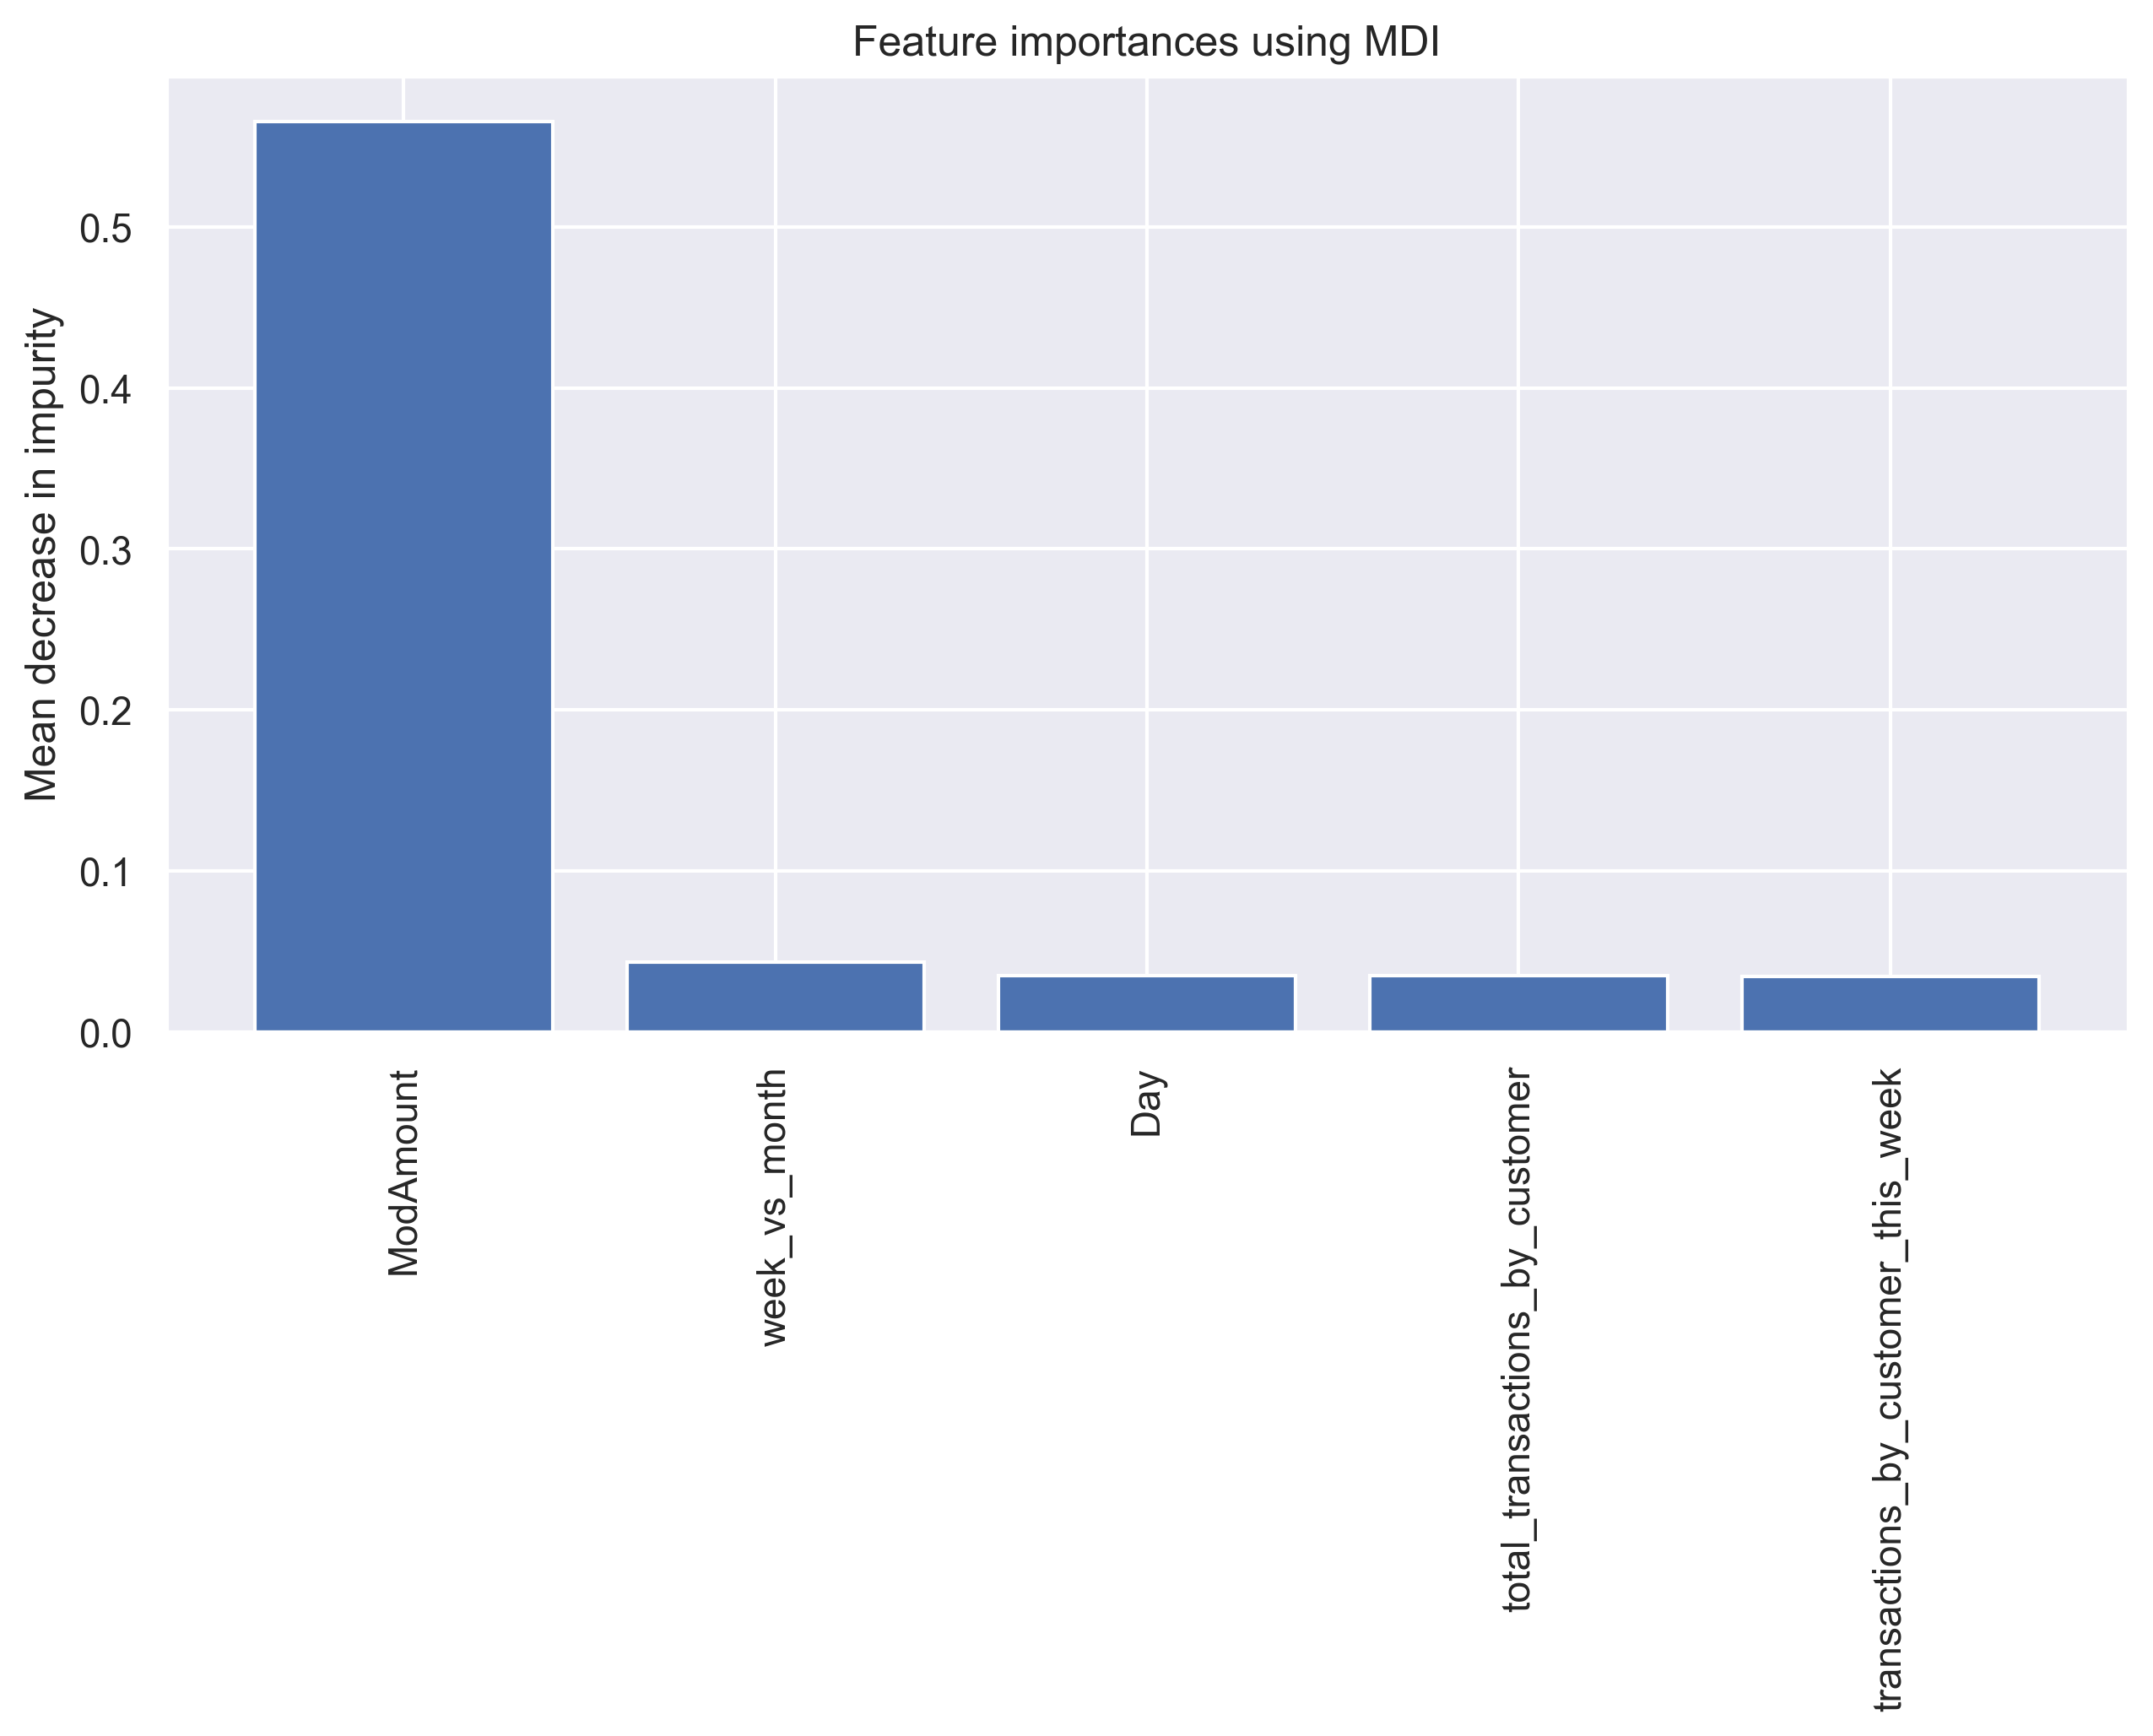

In [109]:
x_names=['0', 'ModAmount', 'week_vs_month', 'Day', 'total_transactions_by_customer', 'transactions_by_customer_this_week']
fig, ax = plt.subplots()
plt.bar([i for i in range(len(forest_importances.nlargest(5)))], forest_importances.nlargest(5))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
ax.set_xticklabels(x_names)
plt.xticks(rotation = 90)
